# EDA House Power
1. import library
2. data collection
3. data show 
4. data cleaning 
5. preproccing
6. statics and visulazation and insights 


In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r'D:\Data_Science\7-Machine_Learning\projects\END-TO-END_projectsML\LOAN_END_TO_END_ML\notebook\data\loan_dataset.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.shape

(614, 13)

In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:

for i in range (df.shape[1]):
    columns=df.columns[i]
    n_null=df[[columns]].isna().sum()
    prec_null=n_null / df.shape[0] * 100

print('Num of null=',n_null)
print('prec_null is equal= ',prec_null)


Num of null= Loan_Status    0
dtype: int64
prec_null is equal=  Loan_Status    0.0
dtype: float64


In [13]:
df.value_counts().sort_values(ascending=True)

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  Male    Yes      1           Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural          N              1
LP001005  Male    Yes      0           Graduate      Yes            3000             0.0                66.0        360.0             1.0             Urban          Y              1
LP001006  Male    Yes      0           Not Graduate  No             2583             2358.0             120.0       360.0             1.0             Urban          Y              1
LP001008  Male    No       0           Graduate      No             6000             0.0                141.0       360.0             1.0             Urban          Y              1
LP001011  Male    Yes      2           Graduate      Yes            5417             4196.0    

In [14]:
category_columns=[feature for feature in df.columns if df[feature].dtype =='O']
numerical_columns=[feature for feature in df.columns if df[feature].dtype != 'O']



In [15]:
print('this columns include numerical:',numerical_columns)
print('this columns include category:',category_columns)

this columns include numerical: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
this columns include category: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [16]:
df.duplicated().sum()

np.int64(0)

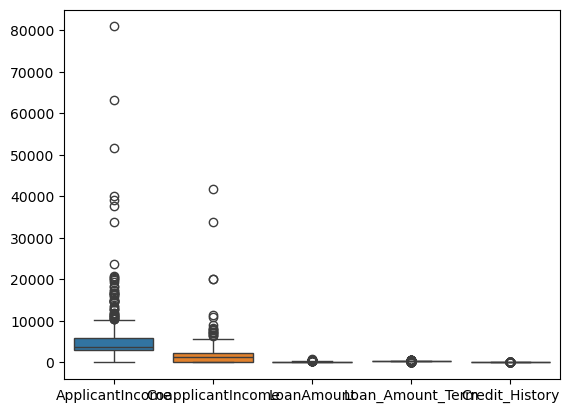

In [17]:
sns.boxplot(df)
plt.show()

In [18]:
def remove_outlier(df,x):
    Q1=df[x].quantile(0.25)
    Q3=df[x].quantile(0.75)
    IQR=Q3 - Q1
    lower_pound=Q1 - 1.5 * IQR
    upper_pound=Q3 + 1.5 * IQR
    return ((df[x]>=lower_pound) & (df[x]<=upper_pound))


In [19]:
df=df[remove_outlier(df,'ApplicantIncome')]
df=df[remove_outlier(df,'CoapplicantIncome')]

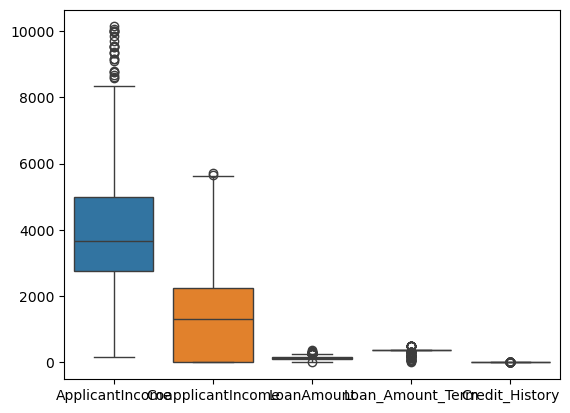

In [20]:
sns.boxplot(df)
plt.show()

In [21]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
#convert data to numeric

df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Married']=df['Married'].replace({'Yes':1,'No':0})
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})
df['Dependents']=df['Dependents'].replace({'3+':4})
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
df['Loan_Status']=df['Loan_Status'].replace({'N':0,'Y':1})

df.head(2)



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            548 non-null    object 
 1   Gender             538 non-null    float64
 2   Married            545 non-null    float64
 3   Dependents         534 non-null    object 
 4   Education          548 non-null    int64  
 5   Self_Employed      519 non-null    float64
 6   ApplicantIncome    548 non-null    int64  
 7   CoapplicantIncome  548 non-null    float64
 8   LoanAmount         528 non-null    float64
 9   Loan_Amount_Term   534 non-null    float64
 10  Credit_History     503 non-null    float64
 11  Property_Area      548 non-null    int64  
 12  Loan_Status        548 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 59.9+ KB


In [24]:
df=df.dropna()

In [25]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.821596,0.643192,0.779343,0.115023,4184.443662,1326.553803,130.699531,342.450704,0.859155,1.004695,0.701878
std,0.383302,0.479621,0.415177,0.319425,1944.767939,1451.578604,53.366117,66.199013,0.348271,0.776100,0.457971
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2790.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3697.500000,1239.500000,124.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5135.000000,2197.000000,157.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,10139.000000,5701.000000,376.000000,480.000000,1.000000,2.000000,1.000000


## Insights & visulazation
-  🔹  نسبة القبول حسب الجنس:
-  🔹  تأثير الحالة الاجتماعية على القرض
-  🔹  تأثير عدد المعالين  
-  🔹  هل التعليم له علاقة؟  
-  🔹  الفرق في دخل المتقدم حسب القبول
-  🔹  رسم العلاقة بين دخل المتقدم ودخل الشريك

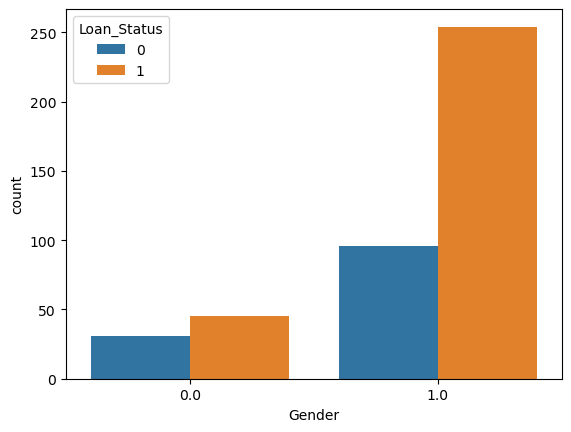

In [27]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')
plt.show()

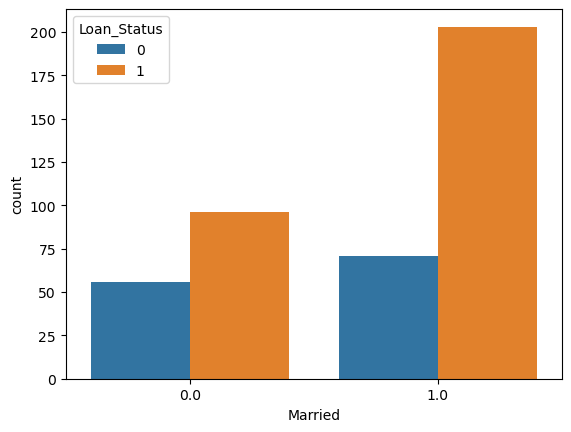

In [28]:
sns.countplot(x='Married',data=df,hue='Loan_Status')
plt.show()



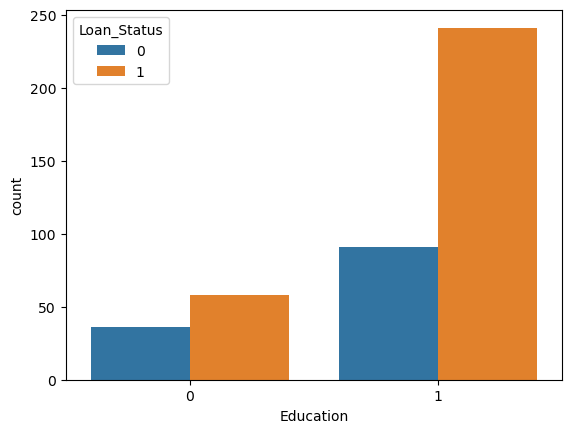

In [29]:
sns.countplot(x='Education',data=df,hue='Loan_Status')
plt.show()




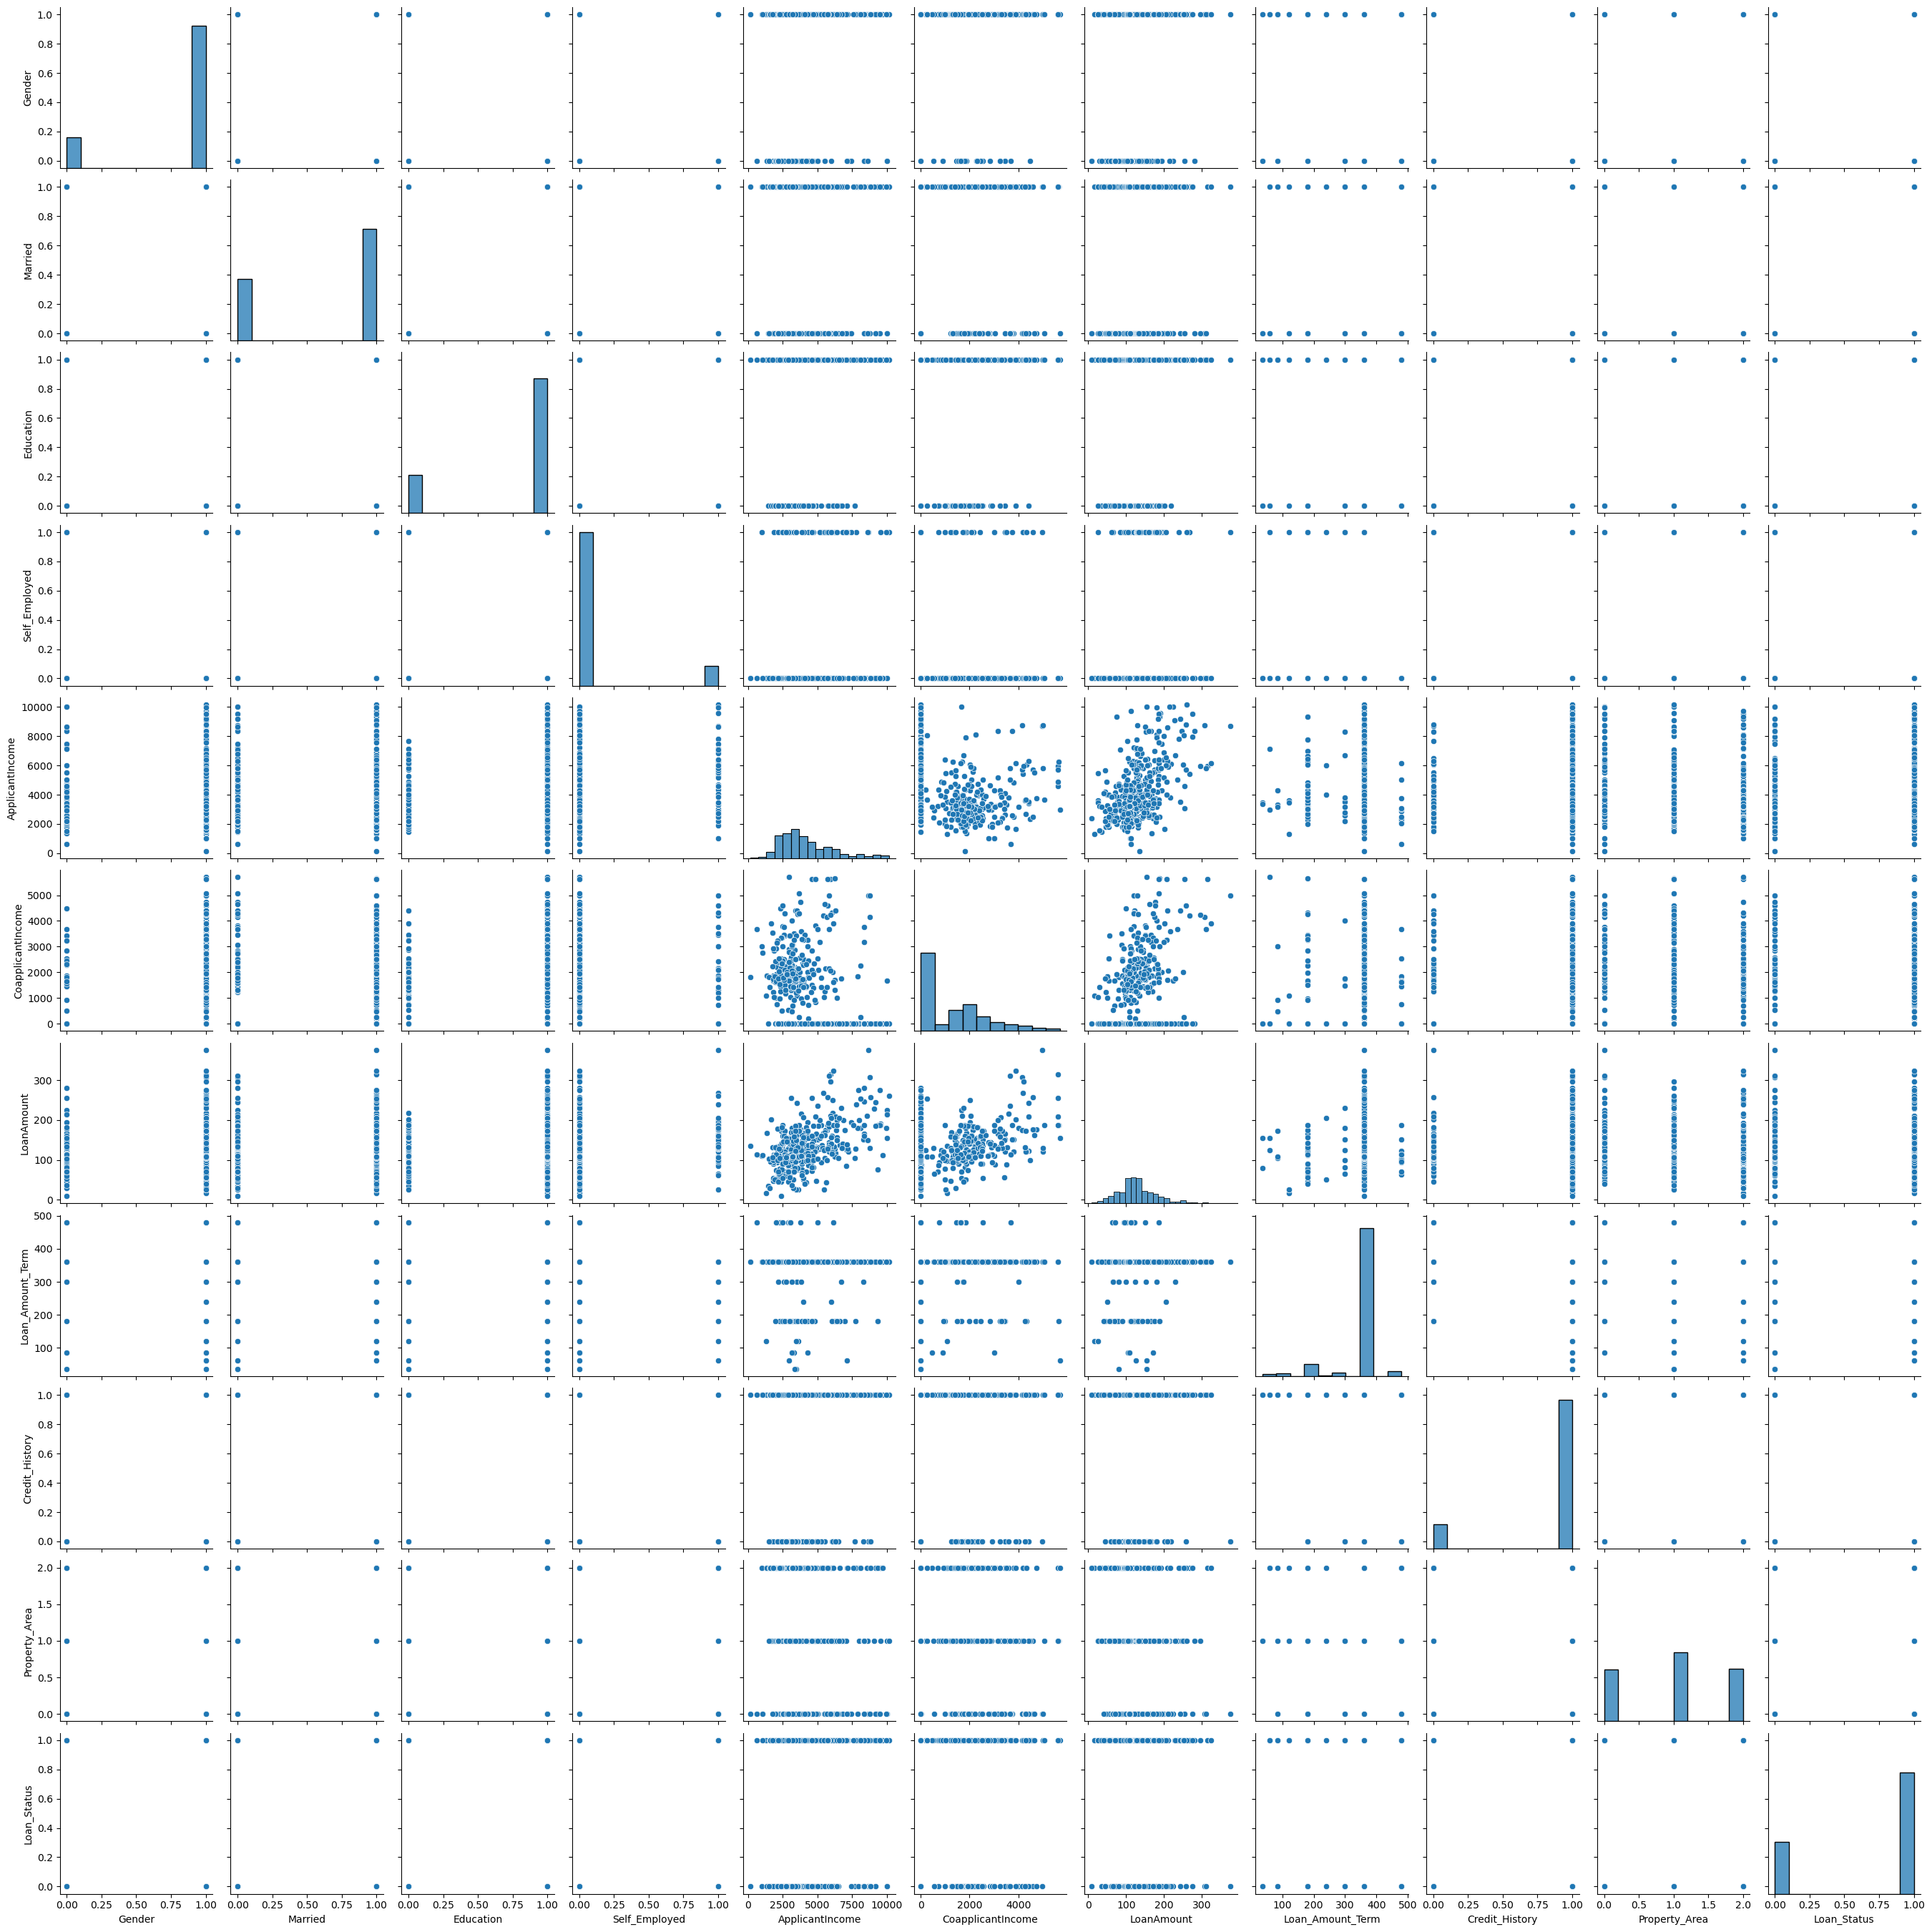

: 

: 

In [ ]:
sns.pairplot(df)

In [31]:
df.to_csv('Loan_after_cleaning&prosessing.csv', index=False)